                                       MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Import CSV File

df = pd.read_csv(r'D:\CodSoft\Task2_Movie_Rating\IMDb_Movies_India.csv', encoding='latin-1')

In [4]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Understanding of Data

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In this dataset, target column is "Rating".

In [6]:
# Shape of the dataset

df.shape

(15509, 10)

Total number of rows: 15509
    
Total number of columns: 10

In [7]:
# Columns Information

df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

1. Name: Name of the movie

2. Year: Release year of the movie

3. Duration: Time duration of the movie

4. Genre: Genre of the movie

5. Rating: Rating of the movie

6. Votes: Total votes given to the movie

7. Director: Director of the movie

8. Actor1/Actor2/Actor3: Lead actors of the movie

In [8]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [9]:
df.describe(include = 'object')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


# 2. Data Cleaning

In [10]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Rename column names

In [11]:
df.rename(columns = {
    "Name": 'title',
    "Year": 'year',
    "Duration": 'duration',
    "Genre": 'genre',
    "Rating": 'rating',
    "Votes" : 'votes',
    "Director": 'director',
    "Actor 1": 'actor1',
    "Actor 2": 'actor2',
    "Actor 3": 'actor3'
}, inplace = True)

In [12]:
df.head()

,title,year,duration,genre,rating,votes,director,actor1,actor2,actor3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Check for null values

In [13]:
df.isnull().sum()

title          0
year         528
duration    8269
genre       1877
rating      7590
votes       7589
director     525
actor1      1617
actor2      2384
actor3      3144
dtype: int64

In [14]:
# Calculate null value percentage

for i in df:
    null_percent = (df[i].isnull().sum()/df[i].shape[0]) * 100
    print("Percentage of null values in {} column is {}".format(i, null_percent))

Percentage of null values in title column is 0.0
Percentage of null values in year column is 3.404474821071636
Percentage of null values in duration column is 53.317428589851055
Percentage of null values in genre column is 12.102650074150494
Percentage of null values in rating column is 48.93932555290477
Percentage of null values in votes column is 48.93287768392546
Percentage of null values in director column is 3.385131214133729
Percentage of null values in actor1 column is 10.426204139531885
Percentage of null values in actor2 column is 15.371719646656782
Percentage of null values in actor3 column is 20.27210007092656


In many of the columns, there aren't many missing values, but in the "rating" column, there's a high percentage of missing data, about 58%. Therefore, we should consider removing all the rows with missing values from the dataset to ensure the data is complete and reliable.

In [15]:
df.dropna(inplace = True)

In [16]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

In [17]:
df

,title,year,duration,genre,rating,votes,director,actor1,actor2,actor3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
5654,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
5655,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
5656,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
5657,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [18]:
df.isnull().sum()

title       0
year        0
duration    0
genre       0
rating      0
votes       0
director    0
actor1      0
actor2      0
actor3      0
dtype: int64

In [19]:
df.shape

(5659, 10)

There are 5659 rows remaining after the null values are eliminated.

# Combine all the actors in a single column

* For visualization, we are combining all the actors. Before modelling, we will remove this column.

In [20]:
df['actors'] = df['actor1'] + ', ' + df['actor2'] + ', ' + df['actor3']

In [21]:
df.head()

,title,year,duration,genre,rating,votes,director,actor1,actor2,actor3,actors
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor"
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"


# Check for duplicates

In [22]:
df.duplicated().sum()

0


There are no duplicate rows in this dataset.

# Remove unwanted symbols from the columns

In [23]:
# Remove ',' from  votes column
df['votes'] = df['votes'].str.replace(',', '')

#Extracting only the text part from the Name column
df['title'] = df['title'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column
df['year'] = df['year'].str.replace(r'[()]', '', regex=True)

# Replacing the 'min'
df['duration'] = df['duration'].str.replace(r' min', '', regex=True)



In [24]:
df.head()

,title,year,duration,genre,rating,votes,director,actor1,actor2,actor3,actors
0,Gadhvi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid"
1,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor"
2,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor"
3,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma"
4,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia"


# Check for datatypes

In [25]:
df.dtypes

title        object
year         object
duration     object
genre        object
rating      float64
votes        object
director     object
actor1       object
actor2       object
actor3       object
actors       object
dtype: object

We need to change the datatype of below mentioned columns:

year --> int

duration --> int

votes --> int

In [26]:
df['year'] = df['year'].astype('int32')
df['duration'] = df['duration'].astype('int32')
df['votes'] = df['votes'].astype('int32')

In [27]:
df.columns

Index(['title', 'year', 'duration', 'genre', 'rating', 'votes', 'director',
       'actor1', 'actor2', 'actor3', 'actors'],
      dtype='object')

# Rearrange Columns

In [28]:
df = df[['title', 'genre', 'director', 'actors', 'actor1', 'actor2', 'actor3', 'year', 'duration', 'votes', 'rating' ]]

In [29]:
df.head()

,title,genre,director,actors,actor1,actor2,actor3,year,duration,votes,rating
0,Gadhvi,Drama,Gaurav Bakshi,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",Rasika Dugal,Vivek Ghamande,Arvind Jangid,2019,109,8,7.0
1,Yaaram,"Comedy, Romance",Ovais Khan,"Prateik, Ishita Raj, Siddhant Kapoor",Prateik,Ishita Raj,Siddhant Kapoor,2019,110,35,4.4
2,Aur Pyaar Ho Gaya,"Comedy, Drama, Musical",Rahul Rawail,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1997,147,827,4.7
3,Yahaan,"Drama, Romance, War",Shoojit Sircar,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,2005,142,1086,7.4
4,A Question Mark,"Horror, Mystery, Thriller",Allyson Patel,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",Yash Dave,Muntazir Ahmad,Kiran Bhatia,2012,82,326,5.6


# 3. Exploratory Data Analysis

# * Univariate

# Year

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '1931'),
  Text(1, 0, '1932'),
  Text(2, 0, '1933'),
  Text(3, 0, '1934'),
  Text(4, 0, '1935'),
  Text(5, 0, '1936'),
  Text(6, 0, '1937'),
  Text(7, 0, '1938'),
  Text(8, 0, '1939'),
  Text(9, 0, '1940'),
  Text(10, 0, '1941'),
  Text(11, 0, '1942'),
  Text(12, 0, '1943'),
  Text(13, 0, '1944'),
  Text(14, 0, '1945'),
  Text(15, 0, '1946'),
  Text(16, 0, '1947'),
  Text(17, 0, '1948'),
  Text(18, 0, '1949'),
  Text(19, 0, '1950'),
  Text(20, 0, '1951'),
  Text(21, 0, '1952'),
  Text(22, 0, '1953'),
  Text(23, 0, '1954'),
  Text(24, 0, '1955'),
  Text(25, 0, '1956')

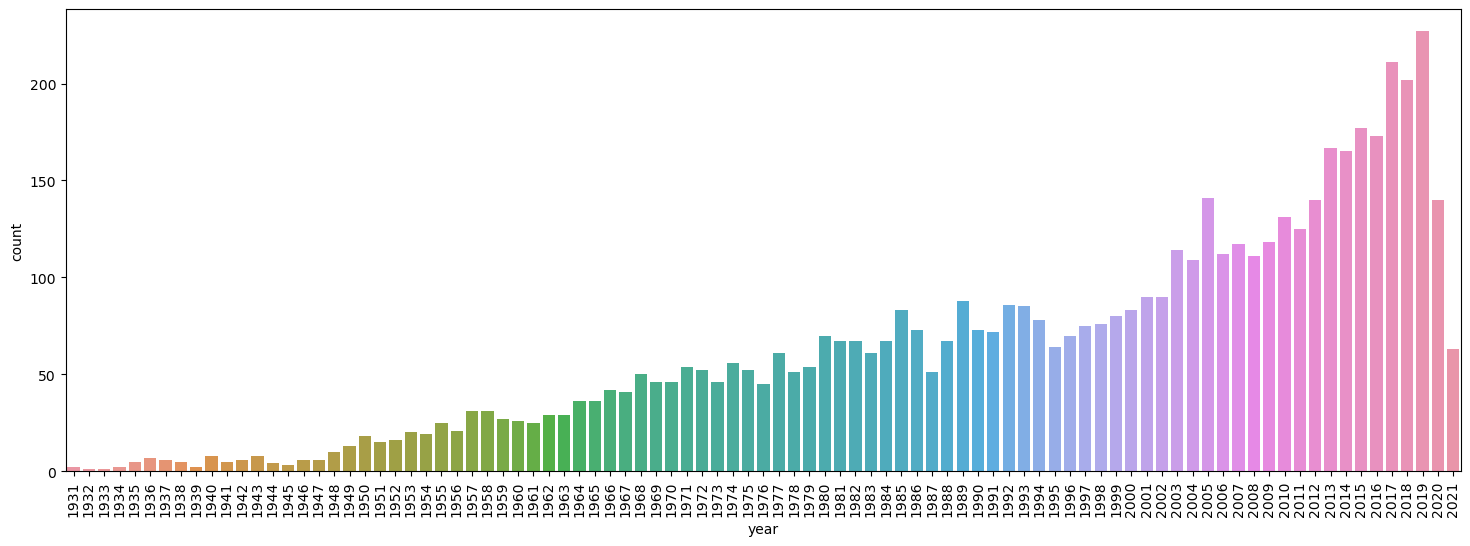

In [30]:
plt.figure(figsize = (18,6))
sns.countplot(data = df, x = 'year')
plt.xticks(rotation = 90)

Analysis:
    
    1. The dataset's maximum number of movies are from the year 2019.

# Duration

<Axes: xlabel='duration', ylabel='Count'>

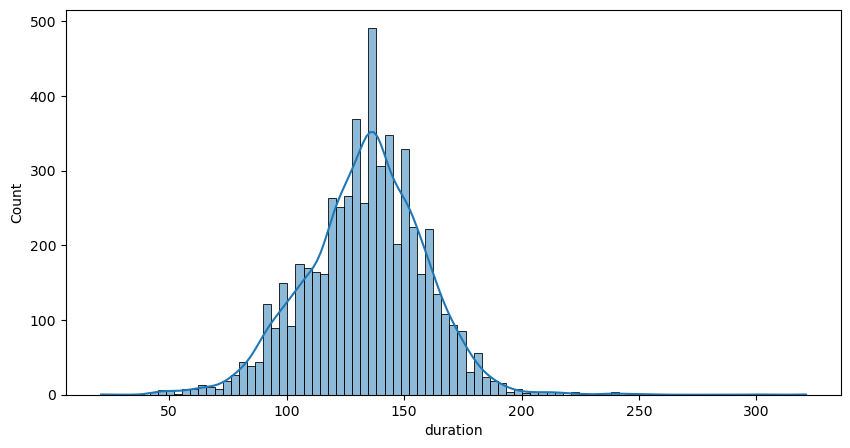

In [31]:
plt.figure(figsize = (10, 5))
sns.histplot(data = df, x = 'duration', kde = True)

Analysis:
    
    1. The duration of movies follow normal distribution.
    
    2. It appears that there are a few anomalies as well.
    
    3. The majority of the movies have a runtime of 120 to 160 minutes.

# Rating

<Axes: xlabel='rating', ylabel='Count'>

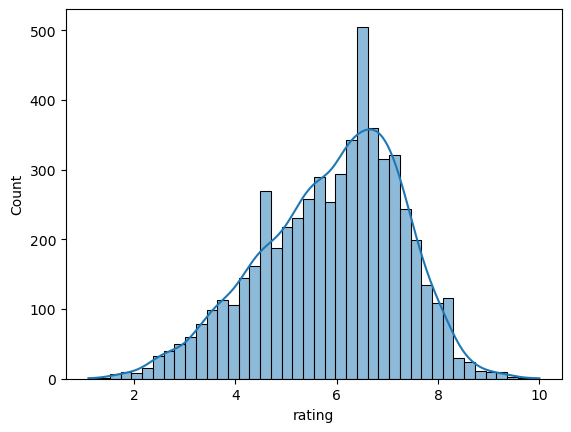

In [32]:
sns.histplot(df['rating'], kde = True)

Analysis:
    
    1. The majority of the films are rated between five and seven.
    
    2. It almost follows a Gaussian distribution.  

# Votes

<Axes: >

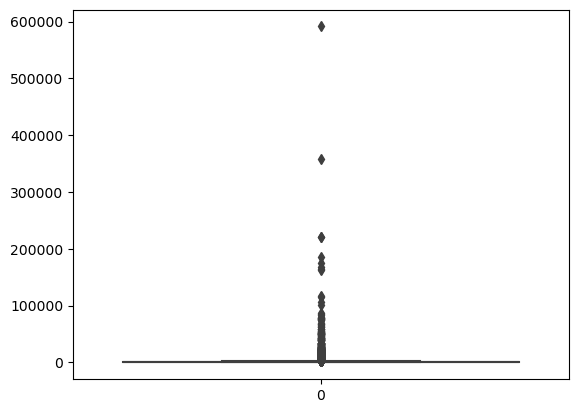

In [33]:
sns.boxplot(df['votes'])

Analysis:
    
    There are many outliers in the votes column.

# Most Frequent Genres

In [34]:
from collections import Counter

# Split the genres and create a list of all genres
genres = [i.split(', ') for i in df['genre']]

# Flatten the list of lists into a single list
genres_flatten = [j for i in genres for j in i]

# Count the occurrence of each genre
counts = Counter(genres_flatten)

# Get the top 10 genres
top_genres = counts.most_common(10)

In [35]:
top_genres

[('Drama', 3796),
 ('Action', 1686),
 ('Romance', 1380),
 ('Comedy', 1344),
 ('Crime', 875),
 ('Thriller', 679),
 ('Family', 416),
 ('Musical', 412),
 ('Mystery', 304),
 ('Adventure', 277)]

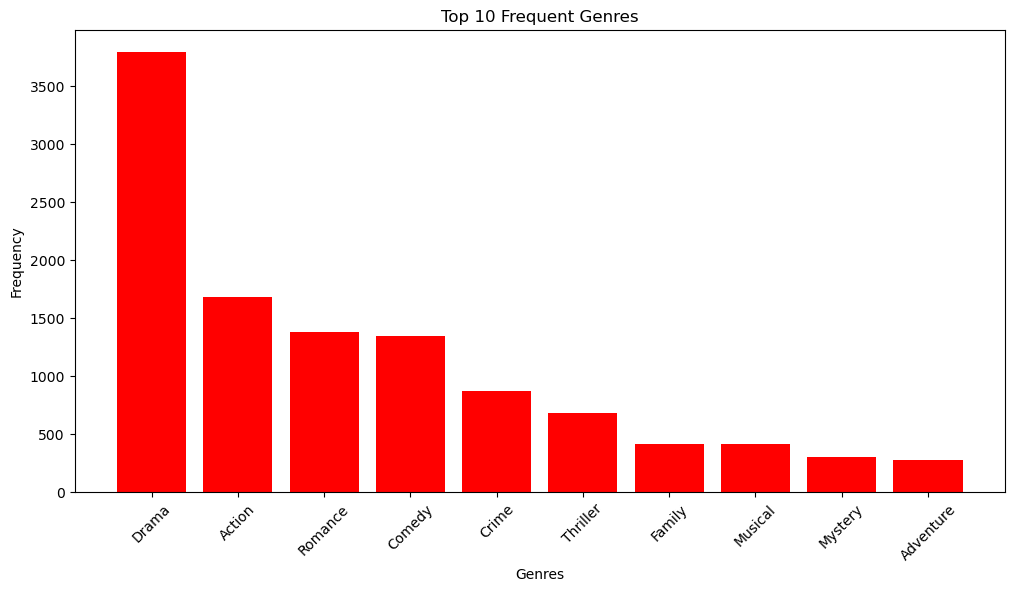

In [36]:
genre, count = zip(*top_genres)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre, count, color='red')
plt.title('Top 10 Frequent Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Actors

In [37]:
actors_dict = {}

for i in df['actors']:
    actors_list = i.split(", ")
    for j in actors_list:
        actors_dict[j] = actors_dict.get(j, 0) + 1

# Sorting the actors based on maximum number of movies
sorted_actors = sorted(actors_dict.items(), key = lambda x: x[1], reverse=True)

# Extracting top 10 genres
max_movies = sorted_actors[:10]

print(max_movies)

[('Mithun Chakraborty', 160), ('Amitabh Bachchan', 148), ('Dharmendra', 146), ('Ashok Kumar', 124), ('Akshay Kumar', 120), ('Shashi Kapoor', 117), ('Jeetendra', 116), ('Sanjay Dutt', 101), ('Rekha', 92), ('Ajay Devgn', 92)]


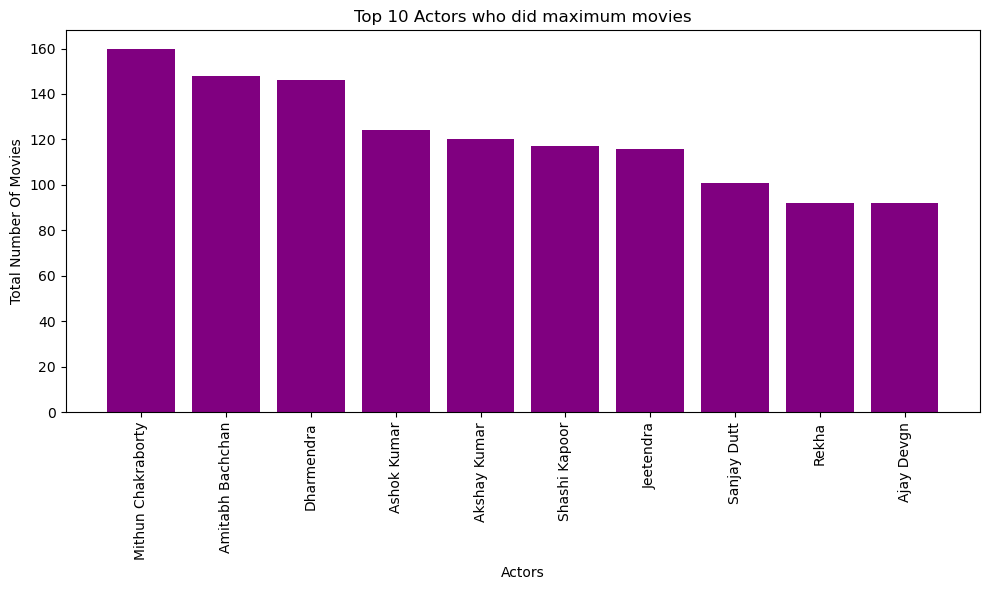

In [38]:
top_actors = []
number_of_movies = []

for actor, number in max_movies:
    top_actors.append(actor)
    number_of_movies.append(number)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_actors, number_of_movies, color='purple')
plt.xlabel('Actors')
plt.ylabel('Total Number Of Movies')
plt.title('Top 10 Actors who did maximum movies')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

# * Bivariate

# Top 10 Directors  By Rating

In [39]:
top_directors = df.groupby('director')['rating'].mean().sort_values(ascending=False).head(10)

In [40]:
top_directors

director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Venkatesh Bk        9.3
Sapna Bhavnani      9.3
Vishwa Bhanu        9.3
Rahul Mallick       9.3
Gautam Joshi        9.3
Name: rating, dtype: float64

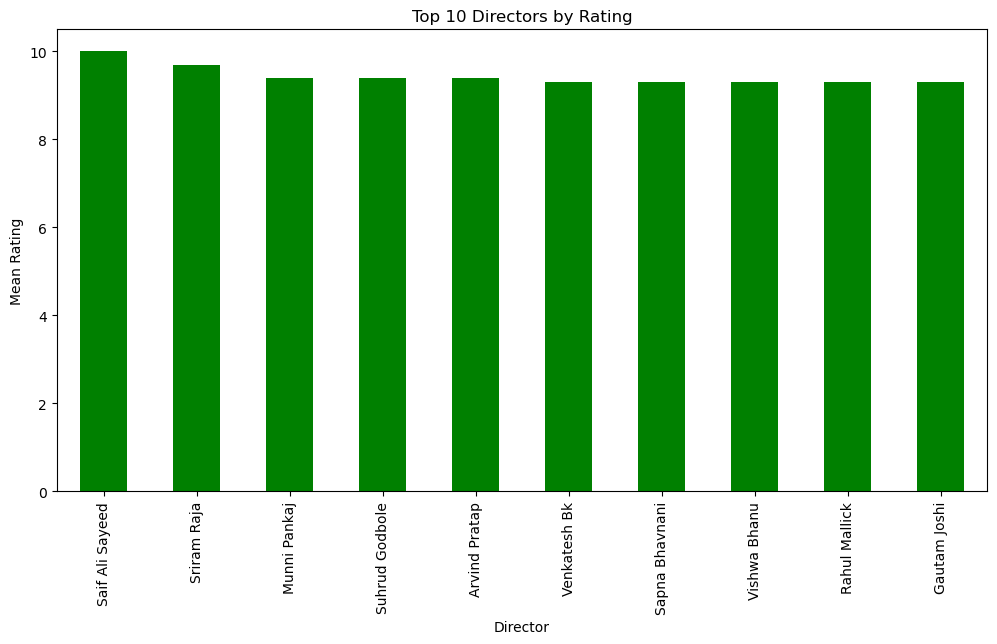

In [41]:
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='green')
plt.title('Top 10 Directors by Rating')
plt.xlabel('Director')
plt.ylabel('Mean Rating')
plt.show()

# Top 10 Directors By Votes

In [42]:
top_director_votes = df.groupby('director')['votes'].sum().sort_values(ascending=False).head(10)

In [43]:
top_director_votes

director
Rajkumar Hirani         695141
Ang Lee                 591417
Karan Johar             252990
Prabhu Deva             246108
Ashutosh Gowariker      245069
Neeraj Pandey           229349
Anurag Kashyap          221032
Garth Davis             220526
Richard Attenborough    220118
Nitesh Tiwari           208778
Name: votes, dtype: int32

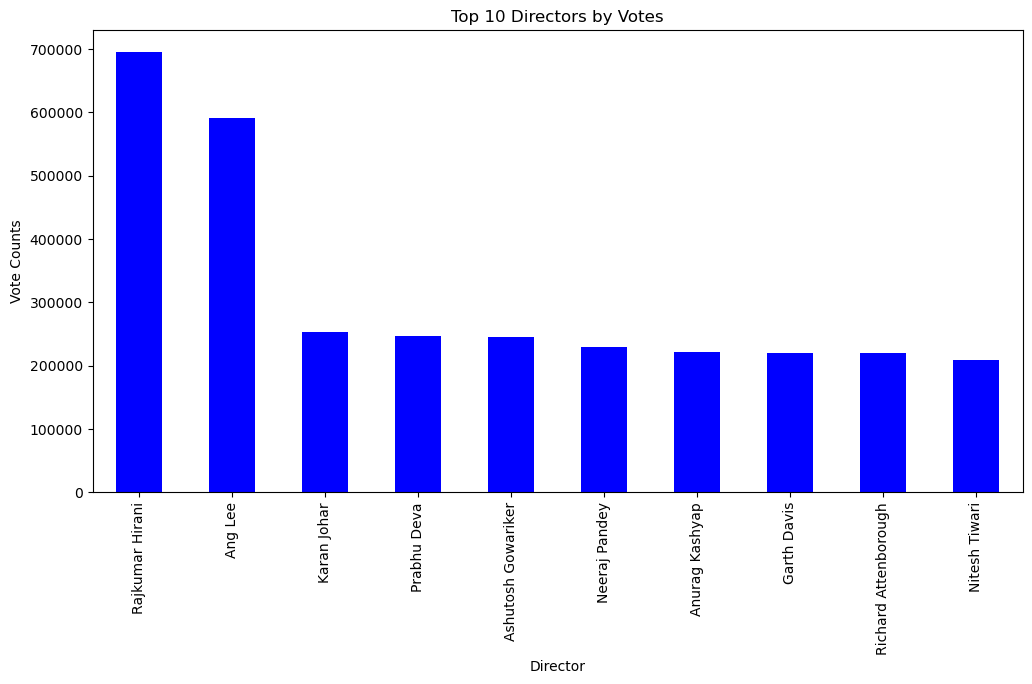

In [44]:
plt.figure(figsize=(12, 6))
top_director_votes.plot(kind='bar', color='blue')
plt.title('Top 10 Directors by Votes')
plt.xlabel('Director')
plt.ylabel('Vote Counts')
plt.show()

# Top 10 Genres By Rating

In [45]:
genre_ratings = {}
for i in range(len(df['genre'])):
    if isinstance(df['genre'][i], str):
        genre_list = df['genre'][i].split(", ")
        for j in genre_list:
            if j in genre_ratings:
                genre_ratings[j].append(df['rating'][i])
            else:
                genre_ratings[j] = [df['rating'][i]]

# Calculating average rating for each genre
for k in genre_ratings:
    genre_ratings[k] = sum(genre_ratings[k]) / len(genre_ratings[k])

# Sorting the genres based on average rating
sorted_genres = sorted(genre_ratings.items(), key = lambda x: x[1], reverse=True)

# Extracting top 10 genres
top_10_genres = sorted_genres[:10]
    
print(top_10_genres)

[('News', 8.0), ('Documentary', 7.608333333333334), ('History', 6.905050505050506), ('Biography', 6.7373913043478275), ('Sport', 6.515000000000001), ('Family', 6.32331730769231), ('Musical', 6.246844660194175), ('Animation', 6.0725), ('Music', 6.071698113207546), ('Drama', 6.056743940990524)]


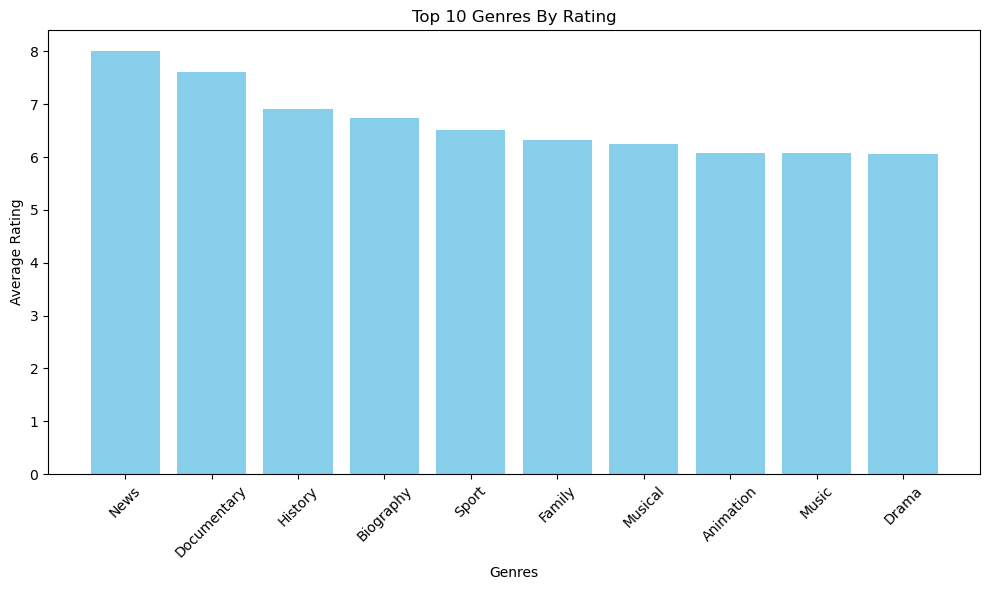

In [46]:
top_genres = []
top_ratings = []

for genre, rating in top_10_genres:
    top_genres.append(genre)
    top_ratings.append(rating)

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_genres, top_ratings, color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres By Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Actors By Rating

In [47]:
# Creating dictionaries for counting movies and summing ratings for each actor
actors_count = {}
actors_sum = {}

for i in range(len(df['actors'])):
    actors_list = df['actors'][i].split(", ")
    for j in actors_list:
        actors_count[j] = actors_count.get(j, 0) + 1
        actors_sum[j] = actors_sum.get(j, 0) + df['rating'][i]

# Calculate the average rating for each actor
average_ratings = {x: actors_sum[x] / actors_count[x] for x in actors_count}

# Sorting the actors based on average rating
top_10_actors = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

print(top_10_actors)

[('Ahaan Jha', 10.0), ('Mahesh Narayan', 10.0), ('Rajasree Rajakumari', 10.0), ('Raj Banerjee', 9.7), ('Emon Chatterjee', 9.7), ('Purshottam Mulani', 9.7), ('Nishi Neha Mishra', 9.4), ('Pankaj Kamal', 9.4), ('Akash Kumar', 9.4), ('Vaibhav Khisti', 9.4)]


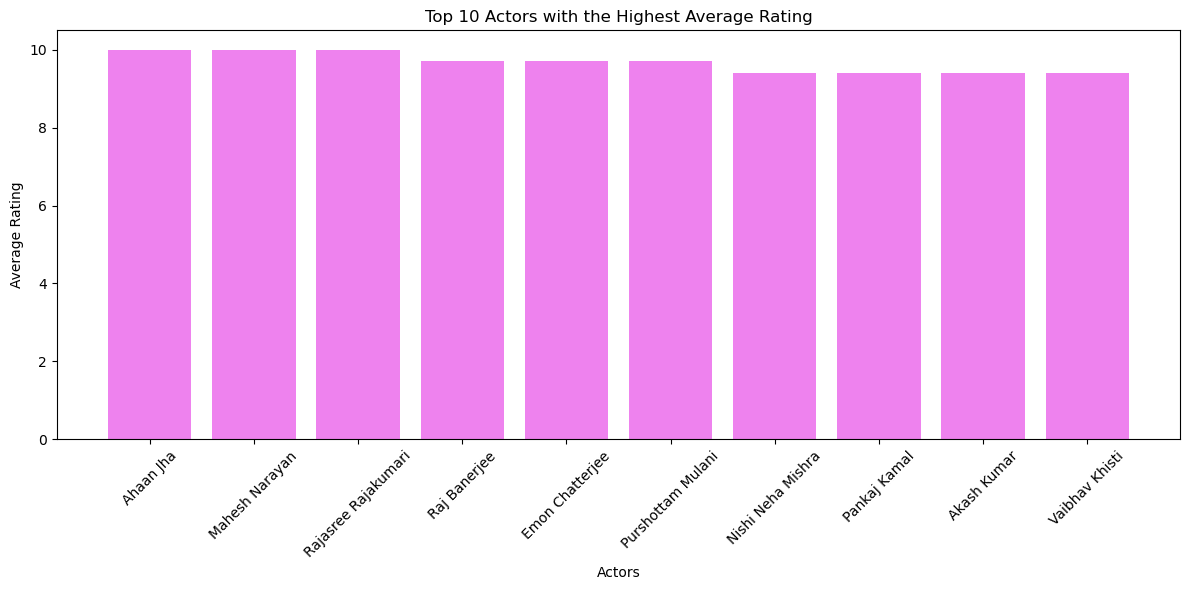

In [48]:
top_actors = []
avg_ratings = []

for actor, rating in top_10_actors:
    top_actors.append(actor)
    avg_ratings.append(rating)

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_actors, avg_ratings, color='violet')
plt.xlabel('Actors')
plt.ylabel('Average Rating')
plt.title('Top 10 Actors with the Highest Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Movies By Rating

In [49]:
top_movies = df[['title', 'rating']].sort_values(by='rating', ascending=False).head(10)

In [50]:
top_movies

,title,rating
3146,Love Qubool Hai,10.0
2027,Half Songs,9.7
2574,June,9.4
5165,The Reluctant Crime,9.4
1897,Gho Gho Rani,9.4
536,Ashok Vatika,9.3
4783,Sindhustan,9.3
3149,Love Sorries,9.3
4609,Secrets of Sinauli,9.3
4321,Refl,9.3


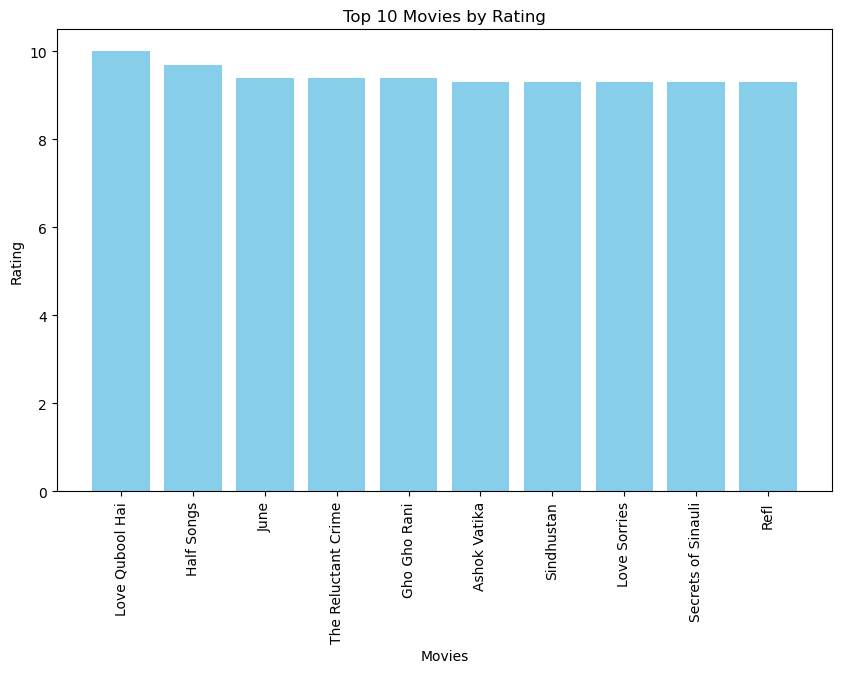

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(top_movies['title'], top_movies['rating'], color='skyblue')
plt.xlabel('Movies')
plt.ylabel('Rating')
plt.title('Top 10 Movies by Rating')
plt.xticks(rotation = 90)
plt.show()

# Top 10 Movies By Votes

In [52]:
top_movies_votes = df[['title', 'votes']].sort_values(by='votes', ascending=False).head(10)

In [53]:
top_movies_votes

,title,votes
3088,Life of Pi,591417
44,Idiots,357889
3094,Lion,220526
1823,Gandhi,220118
5096,The Darjeeling Limited,185127
3092,Like Stars on Earth,175810
4023,PK,168150
1276,Dangal,165074
4200,Radhe,162455
1436,Dil Bechara,117377


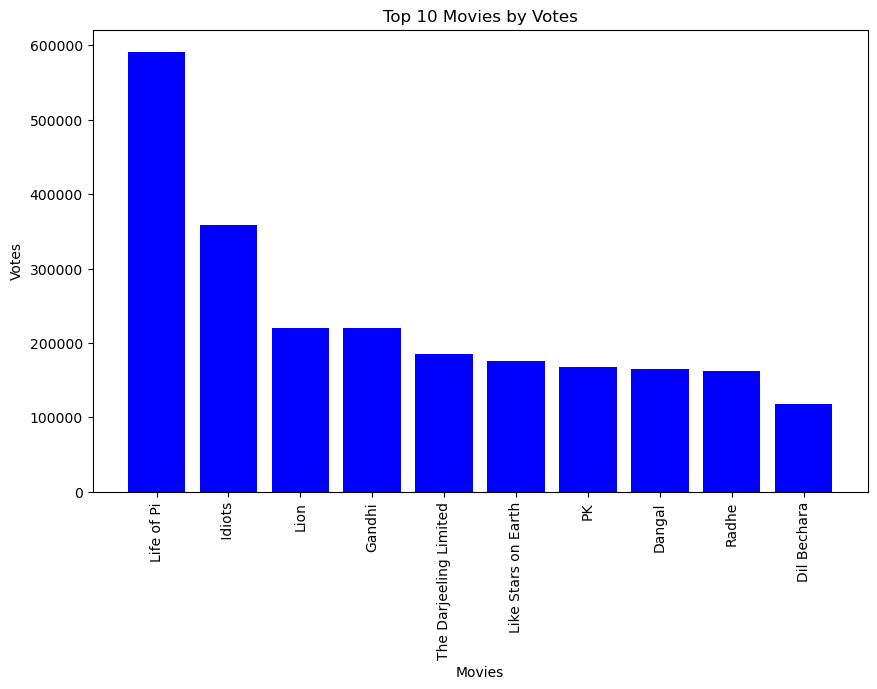

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(top_movies_votes['title'], top_movies_votes['votes'], color='blue')
plt.xlabel('Movies')
plt.ylabel('Votes')
plt.title('Top 10 Movies by Votes')
plt.xticks(rotation = 90)
plt.show()

# 4. Data Preprocessing

In Data Preprocessing, we will perorm:
    
    1. Check for outliers
    2. Check correlation
    3. Add relevant columns
    5. Apply standard scaling
    6. Split data in train and test

# Check Outliers: 

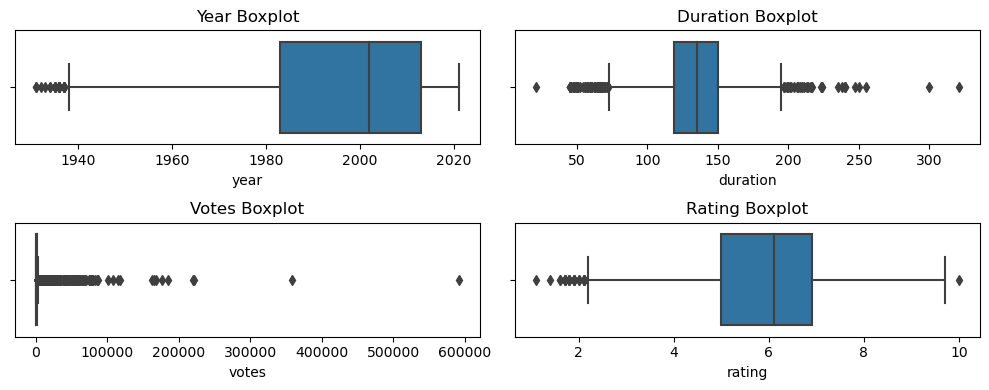

In [55]:
fig ,ax = plt.subplots(2,2,figsize=(10,4))
sns.boxplot(df, x = 'year', ax = ax[0,0])
sns.boxplot(df, x = 'duration', ax = ax[0,1])
sns.boxplot(df, x = 'votes', ax = ax[1,0])
sns.boxplot(df, x = 'rating', ax = ax[1,1])
ax[0,0].set_title('Year Boxplot')
ax[0,1].set_title('Duration Boxplot')
ax[1,0].set_title('Votes Boxplot')
ax[1,1].set_title('Rating Boxplot')
plt.tight_layout()
plt.show()

In [56]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [57]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [58]:
df_num = df.select_dtypes(exclude = 'object')
for i in df_num.columns:
    out_remove(df,i)
    df.reset_index(drop=True,inplace = True)

year ------- outliers present
duration ------- outliers present
votes ------- outliers present
rating ------- outliers present


In [59]:
df.shape

(4626, 11)

* It is evident that there were outliers in the rating categories. Thus, we eliminated the outliers.
    
* Total outliers in the dataset = 1033

* After removing the outliers, we are left with 4626 rows.

# Check Correlation

<Axes: >

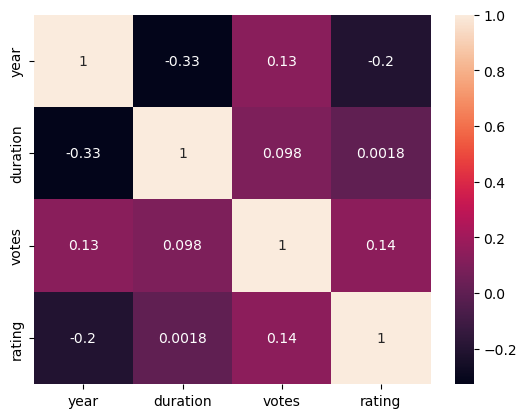

In [60]:
sns.heatmap(df_num.corr(), annot = True)

There is no such correlation between columns.

In [61]:
df.columns

Index(['title', 'genre', 'director', 'actors', 'actor1', 'actor2', 'actor3',
       'year', 'duration', 'votes', 'rating'],
      dtype='object')

# Add Relevant Columns For Model Building

For modelling, we will add some new relevant columns:

     We will apply groupby on the categorical columns and calculate their average rating.

In [62]:
genre_mean_rating = df.groupby('genre')['rating'].transform('mean')
df['genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('director')['rating'].transform('mean')
df['director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('actor1')['rating'].transform('mean')
df['actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('actor2')['rating'].transform('mean')
df['actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('actor3')['rating'].transform('mean')
df['actor3_encoded'] = actor3_mean_rating

In [63]:
df1 = df[[ 'year', 'votes', 'duration', 'genre_mean_rating', 'director_encoded', 'actor1_encoded', 'actor2_encoded', 'actor3_encoded', 'rating']]

In [64]:
df1.head()

,year,votes,duration,genre_mean_rating,director_encoded,actor1_encoded,actor2_encoded,actor3_encoded,rating
0,2019,8,109,6.381458,7.0,6.850000,7.00,7.000000,7.0
1,2019,35,110,5.406757,4.4,4.733333,4.40,4.450000,4.4
2,1997,827,147,6.321739,5.2,4.540000,4.60,5.690000,4.7
3,2005,1086,142,7.233333,7.4,5.123529,7.35,6.314286,7.4
4,2012,326,82,5.450000,5.6,5.600000,5.90,5.600000,5.6


# Standard Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scale = df1.drop('rating', axis = 1)

In [67]:
ss = StandardScaler()

In [68]:
scaled_data = ss.fit_transform(scale)

In [69]:
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)

In [70]:
scaled_df.head(3)

,year,votes,duration,genre_mean_rating,director_encoded,actor1_encoded,actor2_encoded,actor3_encoded
0,1.277870,-0.615846,-1.008857,0.950405,1.066962,0.975077,1.090137,1.084441
1,1.277870,-0.558928,-0.965631,-0.618787,-1.227799,-0.974062,-1.254467,-1.203060
2,0.163777,1.110673,0.633743,0.854263,-0.521719,-1.152093,-1.074113,-0.090707


# Train Test Split

In [71]:
X = scaled_df
y = df1['rating']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)

# 5. Model Building

In [73]:
from sklearn.metrics import r2_score, mean_absolute_error, f1_score, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

In [74]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Mean_Squared_Error_Train', 'Mean_Absolute_Error_Train', 'R2_Score_Train', 'Root_Mean_Squared_Error_Train', 'Mean_Squared_Error_Test', 'Mean_Absolute_Error_Test', 'R2_Score_Test', 'Root_Mean_Squared_Error_Test'])

In [75]:
def score_card(d_f, model_name, y_train, y_test, train_pred, test_pred, train_rmse, test_rmse):
    metrics_dict = {
        'Model_name': model_name,
        'Mean_Squared_Error_Train': mean_squared_error(y_train, train_pred), 
        'Mean_Absolute_Error_Train': mean_absolute_error(y_train, train_pred), 
        'R2_Score_Train': r2_score(train_pred, y_train),
        'Root_Mean_Squared_Error_Train': train_rmse,
        'Mean_Squared_Error_Test': mean_squared_error(y_test, test_pred), 
        'Mean_Absolute_Error_Test': mean_absolute_error(y_test, test_pred), 
        'R2_Score_Test': r2_score(test_pred, y_test),
        'Root_Mean_Squared_Error_Test': test_rmse
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

# 1. Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
ypred_lr =  model_lr.predict(X_test)
ypred_lr_train = model_lr.predict(X_train)

# *RMSE

In [78]:
mse_lr = mean_squared_error(y_test, ypred_lr)
mse_lr_train = mean_squared_error(y_train, ypred_lr_train)
rmse_lr = math.sqrt(mse_lr)
rmse_lr_train = math.sqrt(mse_lr_train)

print(rmse_lr)
print(rmse_lr_train)

0.5163430824334344
0.5397696659010021


In [79]:
df101 = score_card(df_scorecard, 'Linear Regression', y_train, y_test, ypred_lr_train, ypred_lr, rmse_lr_train, rmse_lr)
df101

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.53977,0.26661,0.398461,0.835186,0.516343


# 2. Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

In [81]:
ls = Lasso(alpha = 0.001)
model_ls = ls.fit(X_train, y_train)
ypred_ls =  model_ls.predict(X_test)
ypred_ls_train = model_ls.predict(X_train)

# *RMSE

In [82]:
mse_ls = mean_squared_error(y_test, ypred_ls)
mse_ls_train = mean_squared_error(y_train, ypred_ls_train)
rmse_ls = math.sqrt(mse_ls)
rmse_ls_train = math.sqrt(mse_ls_train)

print(rmse_ls)
print(rmse_ls_train)

0.5163764318244426
0.5397733569274886


In [83]:
df102 = score_card(df101, 'Lasso Regression', y_train, y_test, ypred_ls_train, ypred_ls, rmse_ls_train, rmse_ls)
df102

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376


# 3. Ridge Regression

In [84]:
from sklearn.linear_model import Ridge

In [85]:
rg = Ridge(alpha = 3)
model_rg = rg.fit(X_train, y_train)
ypred_rg =  model_rg.predict(X_test)
ypred_rg_train = model_rg.predict(X_train)

# *RMSE

In [86]:
mse_rg = mean_squared_error(y_test, ypred_rg)
mse_rg_train = mean_squared_error(y_train, ypred_rg_train)
rmse_rg = math.sqrt(mse_rg)
rmse_rg_train = math.sqrt(mse_rg_train)

print(rmse_rg)
print(rmse_rg_train)

0.5163351128105208
0.5397698022497677


In [87]:
df103 = score_card(df102, 'Ridge Regression', y_train, y_test, ypred_rg_train, ypred_rg, rmse_rg_train, rmse_rg)
df103

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376
2,Ridge Regression,0.291351,0.401268,0.806717,0.539770,0.266602,0.398435,0.835106,0.516335


# 4. Decision Tree

In [88]:
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.tree import DecisionTreeRegressor

In [89]:
htmodel_dt = gscv(DecisionTreeRegressor(), param_grid = {'max_depth': [2,5,10,15,20,25],
                                                       'min_samples_leaf': [1,2,3],
                                                       'min_samples_split': [2,3,4],
                                                       'max_leaf_nodes': [2,6,10,14,18,20],
                                                       'min_impurity_decrease': [0,1,2]}, cv = 5)

In [90]:
htmodel_dt.fit(X, y)
print(htmodel_dt.best_params_)

{'max_depth': 5, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [91]:
model_dt_gscv = DecisionTreeRegressor(max_depth = htmodel_dt.best_params_.get('max_depth'),
         min_samples_leaf = htmodel_dt.best_params_.get('min_samples_leaf'),
         min_samples_split = htmodel_dt.best_params_.get('min_samples_split'),
         max_leaf_nodes = htmodel_dt.best_params_.get('max_leaf_nodes'),
         min_impurity_decrease = htmodel_dt.best_params_.get('min_impurity_decrease')).fit(X_train, y_train)

In [92]:
ypred_dt =  model_dt_gscv.predict(X_test)
ypred_dt_train = model_dt_gscv.predict(X_train)

# *RMSE

In [93]:
mse_dt = mean_squared_error(y_test, ypred_dt)
mse_dt_train = mean_squared_error(y_train, ypred_dt_train)
rmse_dt = math.sqrt(mse_dt)
rmse_dt_train = math.sqrt(mse_dt_train)

print(rmse_dt)
print(rmse_dt_train)

0.6436437007503689
0.606653435994645


In [94]:
df104 = score_card(df103, 'Decision Tree Regressor', y_train, y_test, ypred_dt_train, ypred_dt, rmse_dt_train, rmse_dt)
df104

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376
2,Ridge Regression,0.291351,0.401268,0.806717,0.539770,0.266602,0.398435,0.835106,0.516335
3,Decision Tree Regressor,0.368028,0.435155,0.742901,0.606653,0.414277,0.468704,0.717792,0.643644


# 5. Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
htmodel_rf = gscv(RandomForestRegressor(random_state = 110), param_grid = {'n_estimators': [20, 40, 60, 80, 100],
                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                       'max_depth' : [4,5,6,7,8],
                                                       "min_samples_split" : [2,4,6,8,10],
                                                       "bootstrap": [True, False]}, cv = 5)

In [97]:
htmodel_rf.fit(X,y)
print(htmodel_rf.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 100}


In [98]:
model_rf_gscv = RandomForestRegressor(n_estimators = htmodel_rf.best_params_.get('n_estimators'),
                                       max_depth = htmodel_rf.best_params_.get('max_depth'),
                                       max_features = htmodel_rf.best_params_.get('max_features'),
                                       min_samples_split = htmodel_rf.best_params_.get('min_samples_split'),
                                       bootstrap = htmodel_rf.best_params_.get('bootstrap')).fit(X_train, y_train)

In [99]:
ypred_rf =  model_rf_gscv.predict(X_test)
ypred_rf_train = model_rf_gscv.predict(X_train)

# * RMSE

In [100]:
mse_rf = mean_squared_error(y_test, ypred_rf)
mse_rf_train = mean_squared_error(y_train, ypred_rf_train)
rmse_rf = math.sqrt(mse_rf)
rmse_rf_train = math.sqrt(mse_rf_train)

print(rmse_rf)
print(rmse_rf_train)

0.4817314954210245
0.41836430060242097


In [101]:
df105 = score_card(df104, 'Random Forest Regressor', y_train, y_test, ypred_rf_train, ypred_rf, rmse_rf_train, rmse_rf)
df105

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376
2,Ridge Regression,0.291351,0.401268,0.806717,0.539770,0.266602,0.398435,0.835106,0.516335
3,Decision Tree Regressor,0.368028,0.435155,0.742901,0.606653,0.414277,0.468704,0.717792,0.643644
4,Random Forest Regressor,0.175029,0.288397,0.879318,0.418364,0.232065,0.342995,0.842863,0.481731


# 6. Bagging

In [102]:
from sklearn.ensemble import BaggingRegressor

In [103]:
bg = BaggingRegressor(n_estimators = 150, random_state = 110)
model_bg = bg.fit(X_train,y_train)

In [104]:
ypred_bg =  model_bg.predict(X_test)
ypred_bg_train = model_bg.predict(X_train)

# *RMSE

In [105]:
mse_bg = mean_squared_error(y_test, ypred_bg)
mse_bg_train = mean_squared_error(y_train, ypred_bg_train)
rmse_bg = math.sqrt(mse_bg)
rmse_bg_train = math.sqrt(mse_bg_train)

print(rmse_bg)
print(rmse_bg_train)

0.4744996065855778
0.18834051234025176


In [106]:
df106 = score_card(df105, 'Bagging Regressor', y_train, y_test, ypred_bg_train, ypred_bg, rmse_bg_train, rmse_bg)
df106

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376
2,Ridge Regression,0.291351,0.401268,0.806717,0.539770,0.266602,0.398435,0.835106,0.516335
3,Decision Tree Regressor,0.368028,0.435155,0.742901,0.606653,0.414277,0.468704,0.717792,0.643644
4,Random Forest Regressor,0.175029,0.288397,0.879318,0.418364,0.232065,0.342995,0.842863,0.481731
5,Bagging Regressor,0.035472,0.125842,0.978208,0.188341,0.225150,0.332177,0.855783,0.474500


# 7. AdaBoost Regressor

In [107]:
from sklearn.ensemble import AdaBoostRegressor

In [108]:
ab = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.15, random_state = 102, loss = 'linear')
model_ab = ab.fit(X_train,y_train)

In [109]:
ypred_ab =  model_ab.predict(X_test)
ypred_ab_train = model_ab.predict(X_train)

# *RMSE

In [110]:
mse_ab = mean_squared_error(y_test, ypred_ab)
mse_ab_train = mean_squared_error(y_train, ypred_ab_train)
rmse_ab = math.sqrt(mse_ab)
rmse_ab_train = math.sqrt(mse_ab_train)

print(rmse_ab)
print(rmse_ab_train)

0.5683121316968442
0.5719819398433593


In [111]:
df107 = score_card(df106, 'AdaBoost Regressor', y_train, y_test, ypred_ab_train, ypred_ab, rmse_ab_train, rmse_ab)
df107

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376
2,Ridge Regression,0.291351,0.401268,0.806717,0.539770,0.266602,0.398435,0.835106,0.516335
3,Decision Tree Regressor,0.368028,0.435155,0.742901,0.606653,0.414277,0.468704,0.717792,0.643644
4,Random Forest Regressor,0.175029,0.288397,0.879318,0.418364,0.232065,0.342995,0.842863,0.481731
5,Bagging Regressor,0.035472,0.125842,0.978208,0.188341,0.225150,0.332177,0.855783,0.474500
6,AdaBoost Regressor,0.327163,0.419512,0.757520,0.571982,0.322979,0.423323,0.764636,0.568312


# 8. XGBoost Regressor

In [112]:
import xgboost

In [125]:
xg = xgboost.XGBRegressor(n_estimators = 30)
model_xg = xg.fit(X_train, y_train)

In [126]:
ypred_xg =  model_xg.predict(X_test)
ypred_xg_train = model_xg.predict(X_train)

# *RMSE

In [127]:
mse_xg = mean_squared_error(y_test, ypred_xg)
mse_xg_train = mean_squared_error(y_train, ypred_xg_train)
rmse_xg = math.sqrt(mse_xg)
rmse_xg_train = math.sqrt(mse_xg_train)

print(rmse_xg)
print(rmse_xg_train)

0.4894902376646646
0.31388134710912174


In [128]:
df108 = score_card(df107, 'XGBoost Regressor', y_train, y_test, ypred_xg_train, ypred_ab, rmse_xg_train, rmse_xg)
df108

,Model_name,Mean_Squared_Error_Train,Mean_Absolute_Error_Train,R2_Score_Train,Root_Mean_Squared_Error_Train,Mean_Squared_Error_Test,Mean_Absolute_Error_Test,R2_Score_Test,Root_Mean_Squared_Error_Test
0,Linear Regression,0.291351,0.401286,0.806815,0.539770,0.266610,0.398461,0.835186,0.516343
1,Lasso Regression,0.291355,0.401210,0.806420,0.539773,0.266645,0.398333,0.834846,0.516376
2,Ridge Regression,0.291351,0.401268,0.806717,0.539770,0.266602,0.398435,0.835106,0.516335
3,Decision Tree Regressor,0.368028,0.435155,0.742901,0.606653,0.414277,0.468704,0.717792,0.643644
4,Random Forest Regressor,0.175029,0.288397,0.879318,0.418364,0.232065,0.342995,0.842863,0.481731
5,Bagging Regressor,0.035472,0.125842,0.978208,0.188341,0.225150,0.332177,0.855783,0.474500
6,AdaBoost Regressor,0.327163,0.419512,0.757520,0.571982,0.322979,0.423323,0.764636,0.568312
7,XGBoost Regressor,0.098522,0.219798,0.939399,0.313881,0.322979,0.423323,0.764636,0.489490


# Conclusion:

In our movie analysis project, we fixed problems like missing data and errors in the dataset. We learned some cool things, like shorter movies getting better ratings and Drama being a popular genre. We also discovered that the Random Forest model worked the best for predicting ratings, with a high accuracy score of 0.88 on the training data and 0.84 on the test data.